In [14]:
import time
import os
import re
import datetime
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [86]:
division = 'v1_m'
tree = glob.glob('database/{}/*'.format(division))
print(tree)

['database/v1_m\\playerdb_2017-18_regular.csv', 'database/v1_m\\playerdb_2018-19_regular.csv', 'database/v1_m\\playerdb_2019-20_regular.csv', 'database/v1_m\\playerdb_2020-21_regular.csv', 'database/v1_m\\playerdb_2021-22_regular.csv', 'database/v1_m\\teamdb_2017-18_regular.csv', 'database/v1_m\\teamdb_2018-19_regular.csv', 'database/v1_m\\teamdb_2019-20_regular.csv', 'database/v1_m\\teamdb_2020-21_regular.csv', 'database/v1_m\\teamdb_2021-22_regular.csv']


In [2]:
os.getcwd()

'C:\\Users\\fuku_k\\Documents\\pypro\\vleague_stats'

In [136]:
division = 'v3_m'
season = '2021-22'
path = 'database/{0}/teamdb_{1}_regular.csv'.format(division, season)
df = pd.read_csv(path)
df

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,...,OpBP/S,OpSVA,OpSVP,OpSVE,OpSVx,OpSVEff%,OpRA,OpRx,OpRg,OpRSucc%
0,96,39,11,40.6,13.00,22,6,5,27.3,4,...,1.00,73,3,10,11,4.5,52,28.0,10.0,63.5
1,89,45,4,50.6,15.00,19,6,4,31.6,3,...,1.33,62,1,9,13,3.2,60,31.0,16.0,65.0
2,71,35,7,49.3,11.67,10,4,3,40.0,9,...,2.00,57,0,10,6,-1.8,64,30.0,17.0,60.2
3,80,33,14,41.2,11.00,10,3,3,30.0,6,...,3.00,74,5,9,13,8.1,47,32.0,9.0,77.7
4,89,45,9,50.6,15.00,21,10,3,47.6,11,...,3.00,58,1,5,17,6.9,68,28.0,17.0,53.7
5,86,32,7,37.2,10.67,14,4,1,28.6,9,...,3.67,73,3,4,21,9.9,52,24.0,11.0,56.7
6,120,55,10,45.8,13.75,19,8,3,42.1,8,...,2.75,96,3,15,22,4.9,76,29.0,32.0,59.2
7,117,59,7,50.4,14.75,24,14,3,58.3,11,...,2.00,88,1,12,14,1.7,80,42.0,15.0,61.9
8,97,27,8,27.8,9.00,9,2,0,22.2,6,...,3.00,73,6,10,18,11.0,52,26.0,7.0,56.7
9,99,42,7,42.4,14.00,25,9,4,36.0,9,...,2.00,60,3,8,16,8.3,60,24.0,15.0,52.5


In [137]:
# df.iloc[:, 30:]
f = lambda x: 1 if x == 'Win' else 0
df['Win'] = df['Win_Lose'].map(f)
df['Win']

0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     0
9     1
10    1
11    0
12    1
13    0
14    0
15    1
16    1
17    0
18    1
19    0
20    0
21    1
22    0
23    1
24    0
25    1
26    0
27    1
28    0
29    1
30    1
31    0
32    0
33    1
34    0
35    1
36    1
37    0
38    1
39    0
40    1
41    0
42    0
43    1
44    1
45    0
46    1
47    0
48    1
49    0
50    1
51    0
Name: Win, dtype: int64

In [138]:
df.columns

Index(['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%', 'MatchNo.', 'Date', 'Year', 'Month', 'Day', 'Place', 'Venue',
       'Team', 'Op.Team', 'Director', 'Coach', 'Win_Set', 'Lose_Set',
       'Total_Set', 'Win_Lose', 'Get_Point', 'Lose_Point', 'Game_Time',
       'Start_Time', 'End_Time', 'Spectators', 'Jury', 'Chief_Umpire',
       'Sub_Umpire', 'Judgeman', 'Home_Away', 'OpAA', 'OpAP', 'OpAE',
       'OpASucc%', 'OpAP/S', 'OpBAA', 'OpBAP', 'OpBAE', 'OpBASucc%', 'OpBP',
       'OpBP/S', 'OpSVA', 'OpSVP', 'OpSVE', 'OpSVx', 'OpSVEff%', 'OpRA',
       'OpRx', 'OpRg', 'OpRSucc%', 'Win'],
      dtype='object')

In [157]:
df2 = df[['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%']]
df2['BASucc%'] = df2['BASucc%'].replace('-', np.nan).astype(float)
# df2['BASucc%'].replace('-', 0, inplace=True) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AA       52 non-null     int64  
 1   AP       52 non-null     int64  
 2   AE       52 non-null     int64  
 3   ASucc%   52 non-null     float64
 4   AP/S     52 non-null     float64
 5   BAA      52 non-null     int64  
 6   BAP      52 non-null     int64  
 7   BAE      52 non-null     int64  
 8   BASucc%  52 non-null     float64
 9   BP       52 non-null     int64  
 10  BP/S     52 non-null     float64
 11  SVA      52 non-null     int64  
 12  SVP      52 non-null     int64  
 13  SVE      52 non-null     int64  
 14  SVx      52 non-null     int64  
 15  SVEff%   52 non-null     float64
 16  RA       52 non-null     int64  
 17  Rx       52 non-null     float64
 18  Rg       52 non-null     float64
 19  RSucc%   52 non-null     float64
dtypes: float64(8), int64(12)
memory usage: 8.2 KB


C:\Users\fuku_k\AppData\Local\Temp/ipykernel_17136/4215854374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BASucc%'] = df2['BASucc%'].replace('-', np.nan).astype(float)


In [158]:
df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df3

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,BP/S,SVA,SVP,SVE,SVx,SVEff%,RA,Rx,Rg,RSucc%
0,-0.639202,-0.804166,0.606672,-0.585424,-0.132522,0.380831,-0.590366,1.554805,-1.314267,-1.122503,-0.859940,-1.197482,-0.889659,-0.490475,-0.664992,-0.605917,-0.717265,-0.394337,-0.140210,0.448735
1,-0.906638,-0.363991,-1.496458,1.037286,0.876428,-0.026084,-0.590366,0.960321,-0.954836,-1.383084,-1.172314,-0.615033,0.017444,-0.245238,-0.938348,-0.270729,-1.186419,-0.639423,-0.965599,0.278412
2,-1.594331,-1.097616,-0.595117,0.826334,-0.803473,-1.246829,-1.073815,0.365836,-0.252694,0.180402,0.720864,-0.562083,0.924547,-0.490475,-0.664992,0.657484,-1.479641,-0.312642,-1.103164,1.890802
3,-1.250485,-1.244341,1.508014,-0.488061,-1.141471,-1.246829,-1.315540,0.365836,-1.088578,-0.601341,-0.225725,-1.462232,-1.343210,-0.245238,-1.621739,-1.895101,-0.482688,-0.476033,-0.002645,-0.096298
4,-0.906638,-0.363991,0.005778,1.037286,0.876428,0.245192,0.376533,0.365836,0.382578,0.701564,1.355079,-0.615033,0.017444,-1.716664,0.428434,1.121590,-1.186419,-0.966205,-0.828034,-0.493718
5,-1.021254,-1.317704,-0.595117,-1.137145,-1.307948,-0.704276,-1.073815,-0.823132,-1.205602,0.180402,0.720864,-1.409282,-0.889659,-1.471426,-0.118279,0.348080,-0.248110,-0.639423,-0.002645,-0.834364
6,0.277722,0.369634,0.306225,0.258385,0.245834,-0.026084,-0.106917,0.365836,-0.077159,-0.080179,-0.225725,0.179215,-0.889659,0.245238,-0.528314,-0.992672,0.455621,0.504312,-0.277775,0.096735
7,0.163107,0.663084,-0.595117,1.004832,0.750309,0.652107,1.343431,0.365836,1.276973,0.701564,0.484217,0.602814,0.017444,0.980951,0.565112,-0.167594,0.221044,-0.557728,2.060826,-0.209846
8,-0.600997,-1.684517,-0.294669,-2.662492,-2.150421,-1.382468,-1.557265,-1.417616,-1.740567,-0.601341,-0.225725,-1.303382,0.017444,-0.735713,-0.254957,0.709051,-0.717265,-0.966205,-0.277775,-0.970622
9,-0.524586,-0.584079,-0.595117,-0.293336,0.371953,0.787746,0.134808,0.960321,-0.587048,0.180402,0.720864,-0.615033,1.378099,-0.245238,0.018399,1.405211,-1.186419,-0.802814,-1.378293,-0.493718


In [159]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AA       52 non-null     float64
 1   AP       52 non-null     float64
 2   AE       52 non-null     float64
 3   ASucc%   52 non-null     float64
 4   AP/S     52 non-null     float64
 5   BAA      52 non-null     float64
 6   BAP      52 non-null     float64
 7   BAE      52 non-null     float64
 8   BASucc%  52 non-null     float64
 9   BP       52 non-null     float64
 10  BP/S     52 non-null     float64
 11  SVA      52 non-null     float64
 12  SVP      52 non-null     float64
 13  SVE      52 non-null     float64
 14  SVx      52 non-null     float64
 15  SVEff%   52 non-null     float64
 16  RA       52 non-null     float64
 17  Rx       52 non-null     float64
 18  Rg       52 non-null     float64
 19  RSucc%   52 non-null     float64
dtypes: float64(20)
memory usage: 8.2 KB


In [160]:
X = df3 # 説明変数
Y = df['Win']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr_ = lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

In [161]:
lr.coef_[0]

array([ 0.16982094,  0.22232867, -0.7029148 ,  0.42905524,  0.42838953,
        0.10318928,  0.19916141,  0.46505142,  0.27841627,  0.59546656,
        0.51837319,  1.3728594 , -0.38198708, -0.32468832, -0.11291709,
       -0.16936822, -1.23875108, -0.92937096, -0.39165237,  0.28088999])

In [162]:
df3.columns

Index(['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%'],
      dtype='object')

In [163]:
Y_pred = lr.predict(X_test)
print(Y_pred)
print(Y_test)
count = 0
for i,j in zip(Y_pred, Y_test):
    if i == j:
        count += 1
print(count/len(Y_pred))

[0 0 0 1 1 1 1 0 0 1 1]
28    0
37    0
11    0
34    0
2     1
30    1
40    1
32    0
26    0
4     1
10    1
Name: Win, dtype: int64
0.9090909090909091


In [164]:
# df4 = pd.DataFrame(list(zip(df3.columns, lr.coef_[0])), columns=['stats', 'coef_'])
# df4 = pd.DataFrame(lr.coef_[0], index=df3.columns, columns=[division])
# df4 = pd.DataFrame(index=df3.columns)
# df4

In [165]:
df4[division] = lr.coef_[0]
df4

,v1_w,v1_m,v2_m,v2_w,v3_m
AA,0.672032,1.163620,0.758085,0.306941,0.169821
AP,1.267015,1.026643,0.860230,0.610303,0.222329
AE,0.101618,-0.350317,-0.305433,-0.663021,-0.702915
ASucc%,0.996126,0.446458,0.519178,0.560581,0.429055
AP/S,0.408694,0.290289,0.346901,0.929312,0.428390
BAA,0.241355,0.091547,0.296295,-0.316756,0.103189
BAP,-0.388875,-0.132144,-0.605200,-0.402910,0.199161
BAE,0.112594,-0.113072,0.023233,0.298056,0.465051
BASucc%,-0.076350,0.231423,0.131436,0.293162,0.278416
BP,0.063189,0.242524,0.333560,0.645399,0.595467


In [166]:
division

'v3_m'

In [167]:
# sns.heatmapplot(df3)

AttributeError: module 'seaborn' has no attribute 'heatmapplot'

In [168]:
df3.columns

Index(['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%'],
      dtype='object')

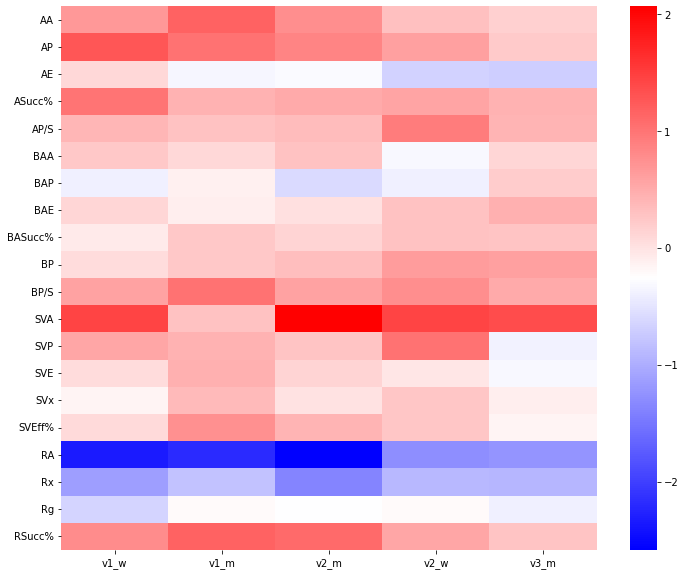

In [169]:
plt.figure(figsize=(12,10))
sns.heatmap(df4, cmap='bwr')
plt.show()